### Zadanie 1
Wygeneruj chmurę n losowych punktów w 2D, a następnie zastosuj algorytm symulowanego wyżarzania do przybliżonego rozwiązania problemu komiwojażera dla tych punktów.  
- Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości n oraz 3
różnych układów punktów w 2D (rozkład jednostajny, rozkład normalny z czterema
różnymi grupami parametrów, dziewięć odseparowanych grup punktów).  
- Zbadaj wpływ sposobu generacji sąsiedniego stanu (consecutive swap vs. arbitrary
swap) oraz funkcji zmiany temperatury na zbieżność procesu optymalizacji.  
- Przedstaw wizualizację (saoptimset) działania procedury minimalizującej funkcję
celu.

In [160]:
import matplotlib.pyplot as plt
import numpy.random as rand
import matplotlib as mpl
import networkx as nx
from random import random,randint,sample
import math

In [271]:
def nodesUniform(n):
    return [(random(), random()) for i in range(n)]

def nodesNormal(mu,sigma,n):
    return [(rand.normal(mu, sigma),rand.normal(mu, sigma))for i in range(n)]

def getPath(nodes):    
    return list(map(lambda i: nodes[i], range(len(nodes))))

def pairs(list):
    return zip(list, list[1:])

def dist(a, b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

def cost(path):
    cost = 0
    for pair in pairs(path):
        cost += dist(pair[0],pair[1])
    return cost

def consecutiveSwap(old):
    new = old.copy()
    i1 = randint(0, len(new)-1)    
    i2 = (i1+1) % len(new)
    new[i1], new[i2] = new[i2], new[i1]
    return new

def arbitrarySwap(old):
    new = old.copy()
    i1, i2 = sample(range(len(new)), 2)
    new[i1], new[i2] = new[i2], new[i1]
    return new

def acceptProb(curEnergy, candidateEnergy, t):
    return np.exp(float(curEnergy - candidateEnergy) / t)


def simulatedAnnealing(oldPath, changePath, maxIter,t=10*3,changeTemperature = lambda t: .999999*t):
    temperatures = []
    energies = []

    curCost = cost(oldPath)
    bestCost = curCost
    
    for i in range (maxIter):
        if (i % 10**5 == 0): 
            print ("Iteration",i,"Temperature =",t,"Best Cost = ",bestCost," Current Cost = " , curCost)
        temperatures.append(t)
        energies.append(curCost)
        
        newPath = changePath(oldPath)
        candidateCost = cost(newPath)
        
        if(acceptProb(curCost, candidateCost, t) > random()):
            oldPath = newPath
            curCost = candidateCost 
        if (bestCost > curCost): 
            bestPath = oldPath
            bestCost = curCost
            
        t = changeTemperature(t)

    return bestPath, temperatures, energies


In [249]:
def draw_path(path, plot, title=None):
    plot.set_title(title)
    plot.axis('off')

    G = nx.Graph()
    for i, edge in enumerate(pairs(list(path))):
        G.add_edge(*edge, order=i)

    pos = {(x, y): [x, y] for (x, y) in path}
    edgeColor = [order for _, _, order in G.edges(data='order')]

    nx.draw_networkx_nodes(G, pos, node_size=5, node_color='orange')
    nx.draw_networkx_edges(G, pos, width=1, edge_color=edgeColor)

def draw_plot(values, plot, title=None):
    plot.set_title(title)
    plot.plot(values, linewidth=0.5)

In [216]:
def run(nodes,changePath,maxIter = 10**5*4):
    startPath = getPath(nodes)
    resultPath, temperatures, energies = simulatedAnnealing(startPath, changePath ,maxIter)

    fig = plt.figure(figsize=(7, 6), dpi=300)
    fig.tight_layout()

    draw_path(startPath, fig.add_subplot(2, 2, 1), title='Before')
    draw_path(resultPath, fig.add_subplot(2, 2, 2), title='After')
    draw_plot(energies, fig.add_subplot(2, 2, 3), title='Cost' )
    draw_plot(temperatures, fig.add_subplot(2, 2, 4), title='Temperature')

    plt.show()

Iteration 0 Temperature = 30 Best Cost =  9.603450326461646  Current Cost =  9.603450326461646
Iteration 100000 Temperature = 27.145121183743633 Best Cost =  6.175800209598882  Current Cost =  9.864384949918632
Iteration 200000 Temperature = 24.561920136004343 Best Cost =  5.982737564863027  Current Cost =  9.106237518093142
Iteration 300000 Temperature = 22.224543286575905 Best Cost =  5.982737564863027  Current Cost =  10.775758661313457


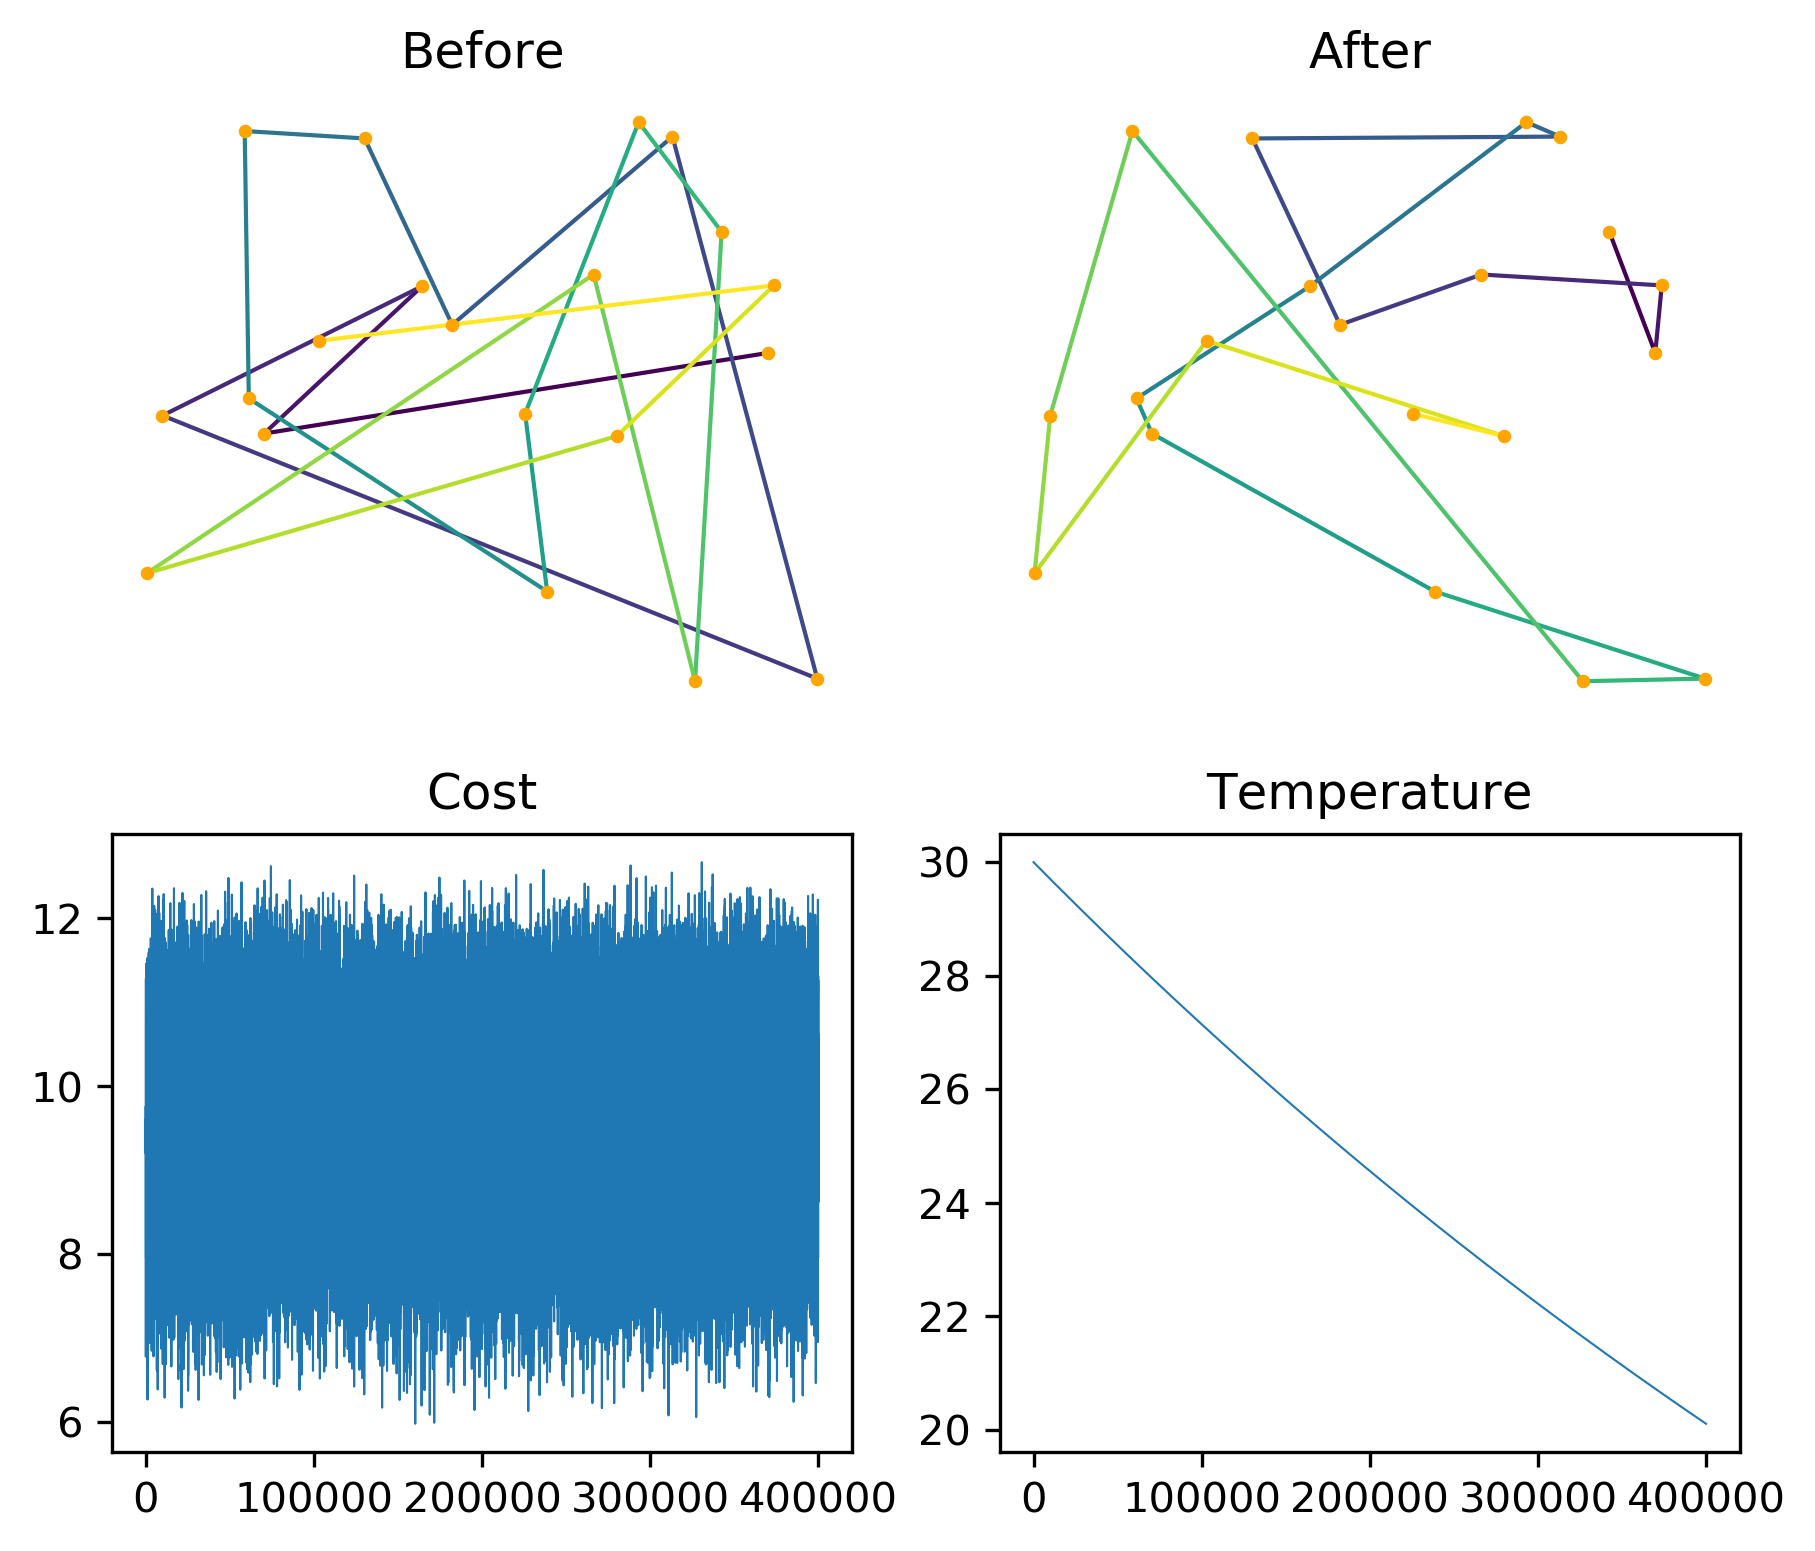

In [272]:
nodes = nodesUniform(20)
run(nodes,arbitrarySwap)

Iteration 0 Temperature = 30 Best Cost =  8.512649633129826  Current Cost =  8.512649633129826
Iteration 100000 Temperature = 27.145121183743633 Best Cost =  5.880615355610223  Current Cost =  9.961860906067853
Iteration 200000 Temperature = 24.561920136004343 Best Cost =  5.880615355610223  Current Cost =  9.281620798641546
Iteration 300000 Temperature = 22.224543286575905 Best Cost =  5.880615355610223  Current Cost =  9.932647974969932


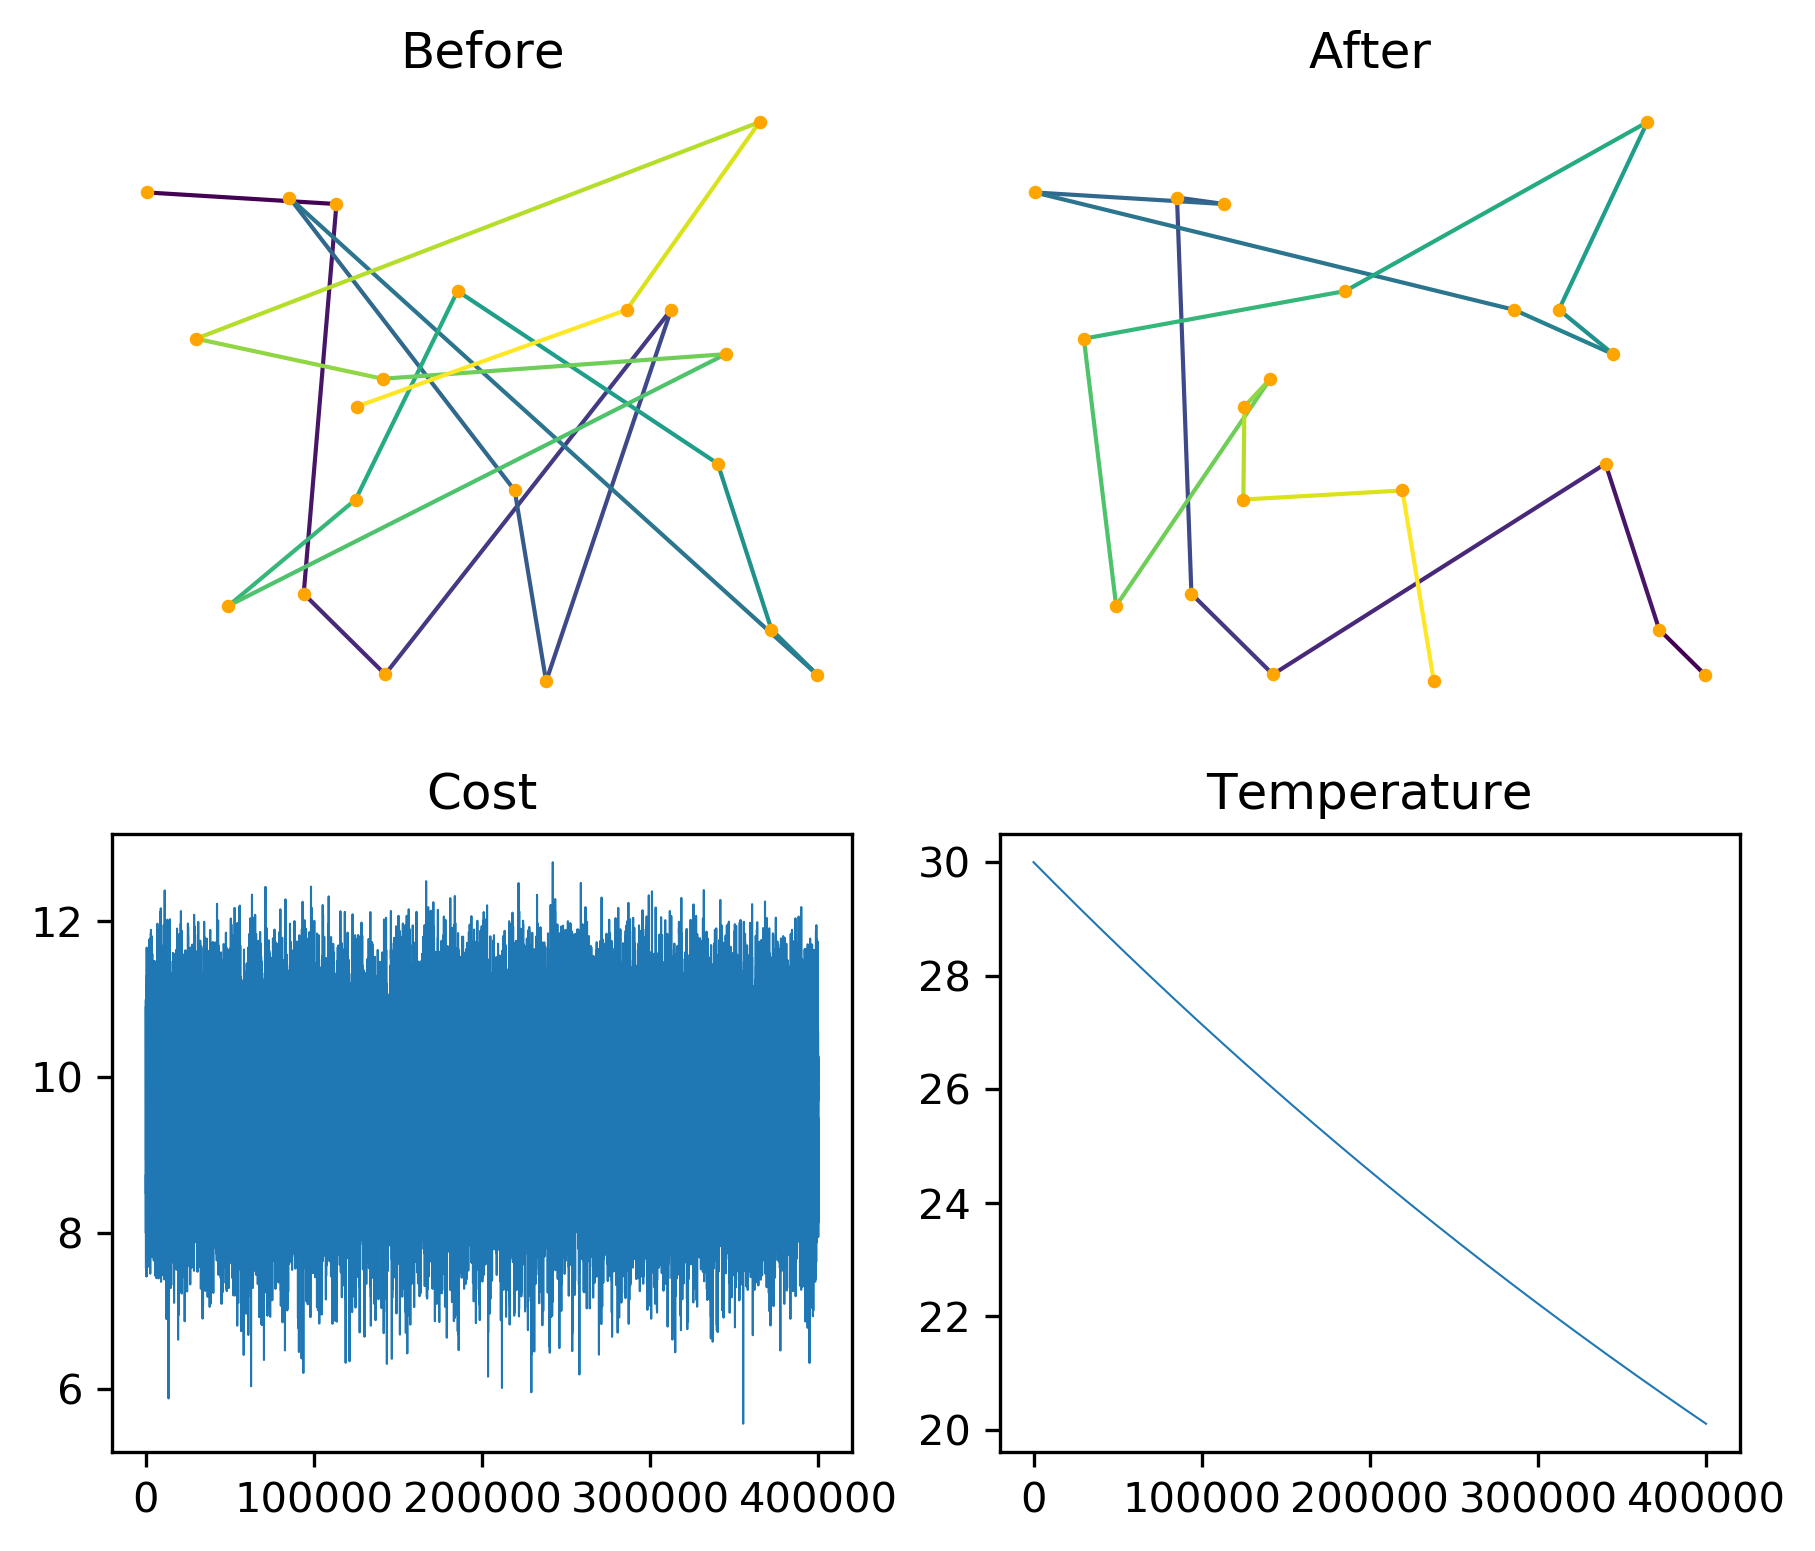

In [273]:
nodes = nodesUniform(20)
run(nodes,consecutiveSwap)

Iteration 0 Temperature = 30 Best Cost =  13.194564458245758  Current Cost =  13.194564458245758
Iteration 100000 Temperature = 0.2021131434084025 Best Cost =  5.630032219006295  Current Cost =  5.678582612164269
Iteration 200000 Temperature = 0.0013616574246141675 Best Cost =  5.630032219006295  Current Cost =  5.630032219006297
Iteration 300000 Temperature = 9.17362874447174e-06 Best Cost =  5.630032219006295  Current Cost =  5.630032219006297


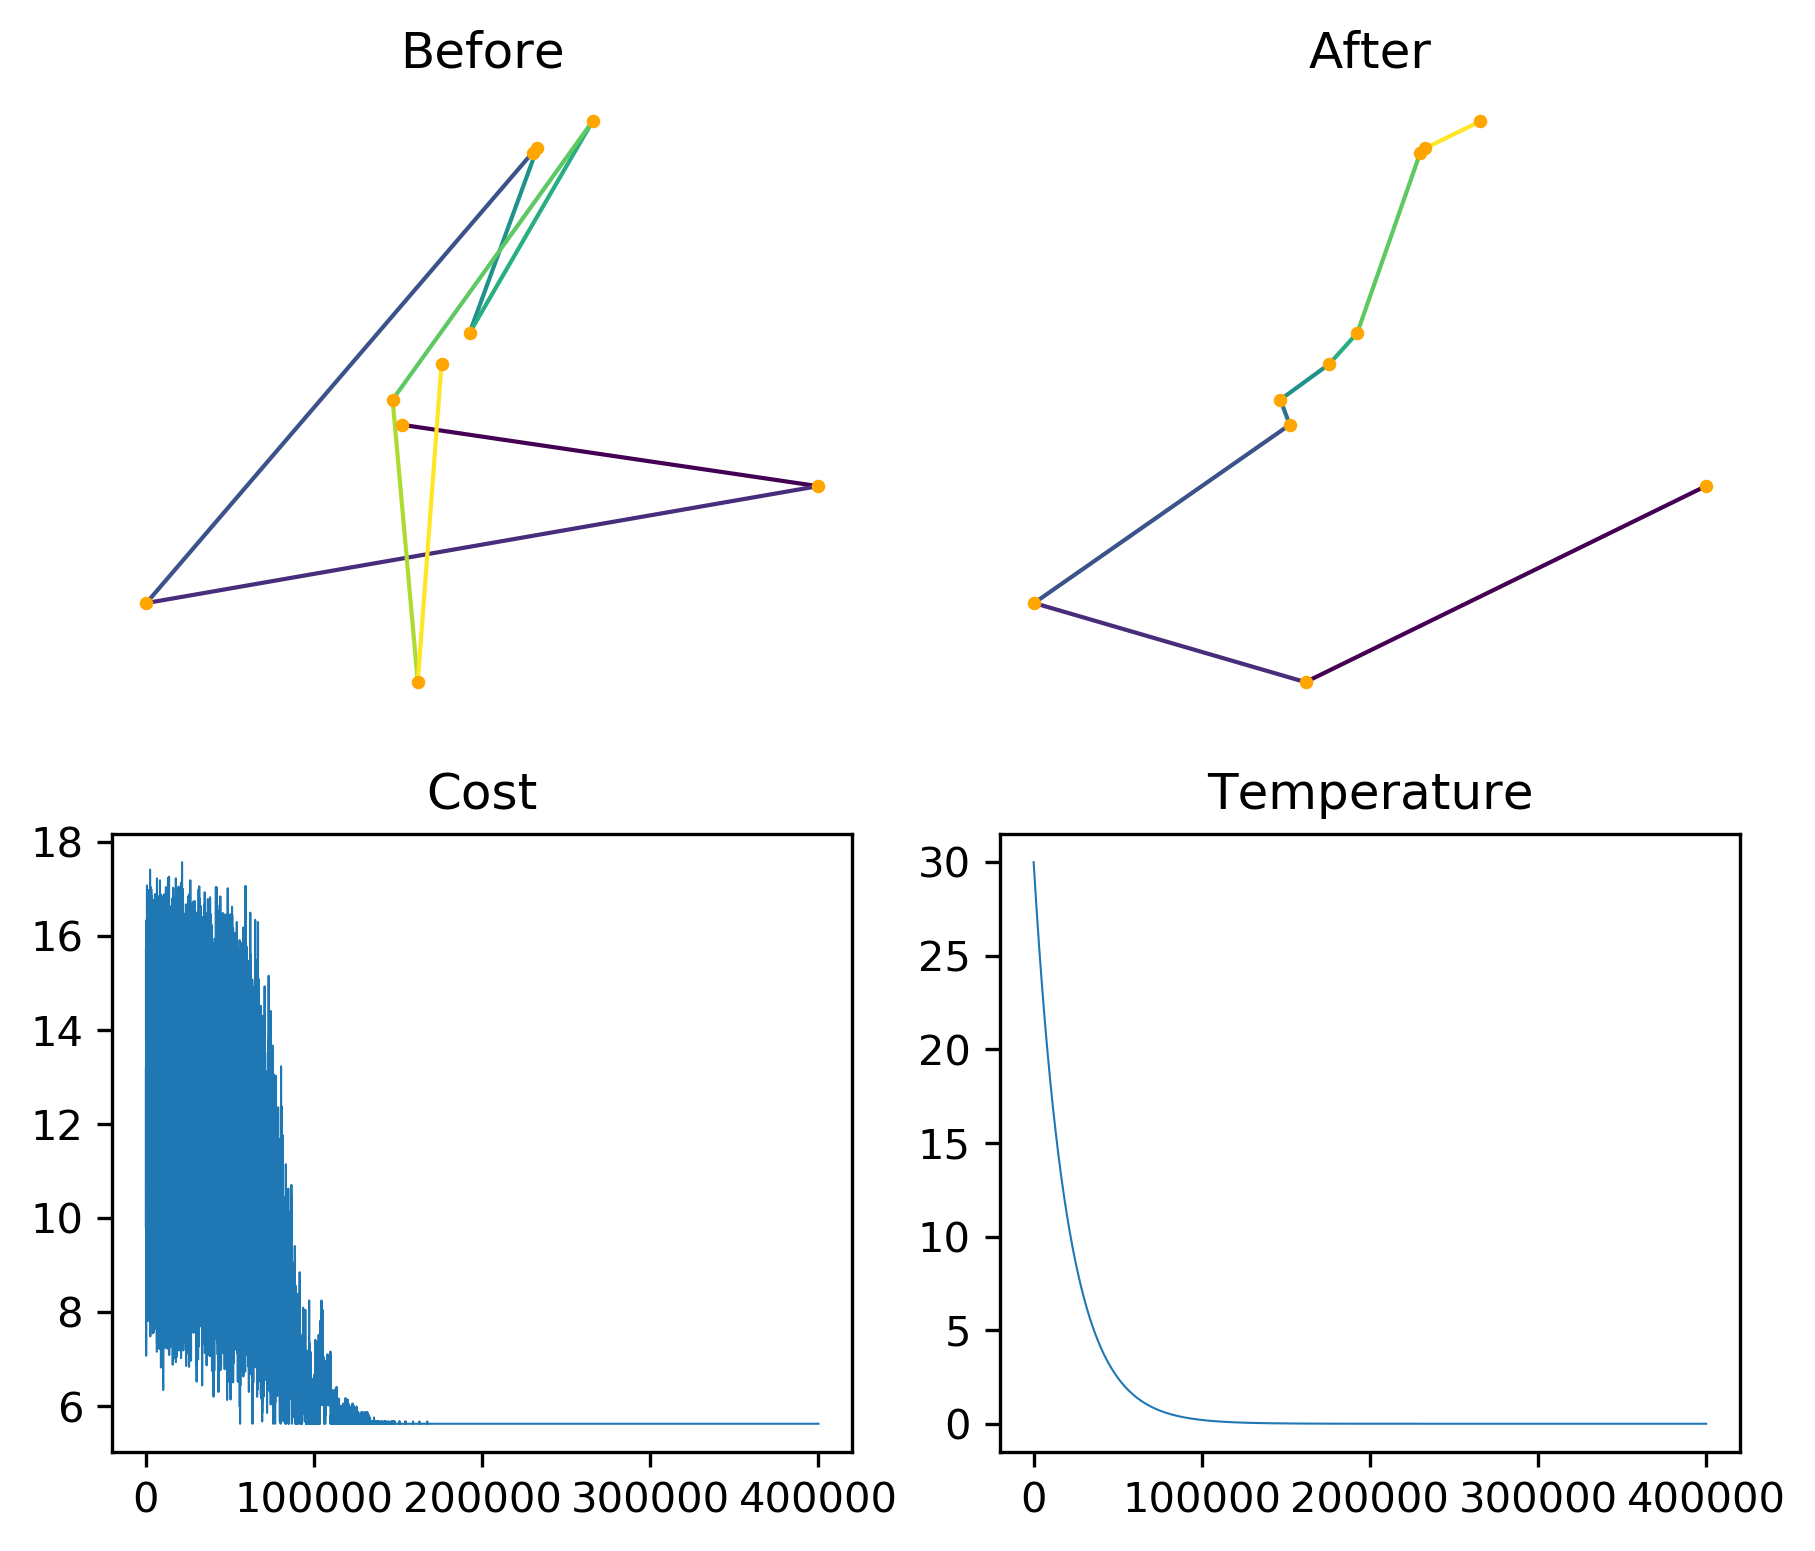

In [258]:
nodes = nodesNormal(0,1,10)
run(nodes,arbitrarySwap)

Iteration 0 Temperature = 30 Best Cost =  284.878953955504  Current Cost =  284.878953955504
Iteration 100000 Temperature = 0.2021131434084025 Best Cost =  119.30054495061229  Current Cost =  119.30054495061229
Iteration 200000 Temperature = 0.0013616574246141675 Best Cost =  119.30054495061229  Current Cost =  119.30054495061229
Iteration 300000 Temperature = 9.17362874447174e-06 Best Cost =  119.30054495061229  Current Cost =  119.30054495061229


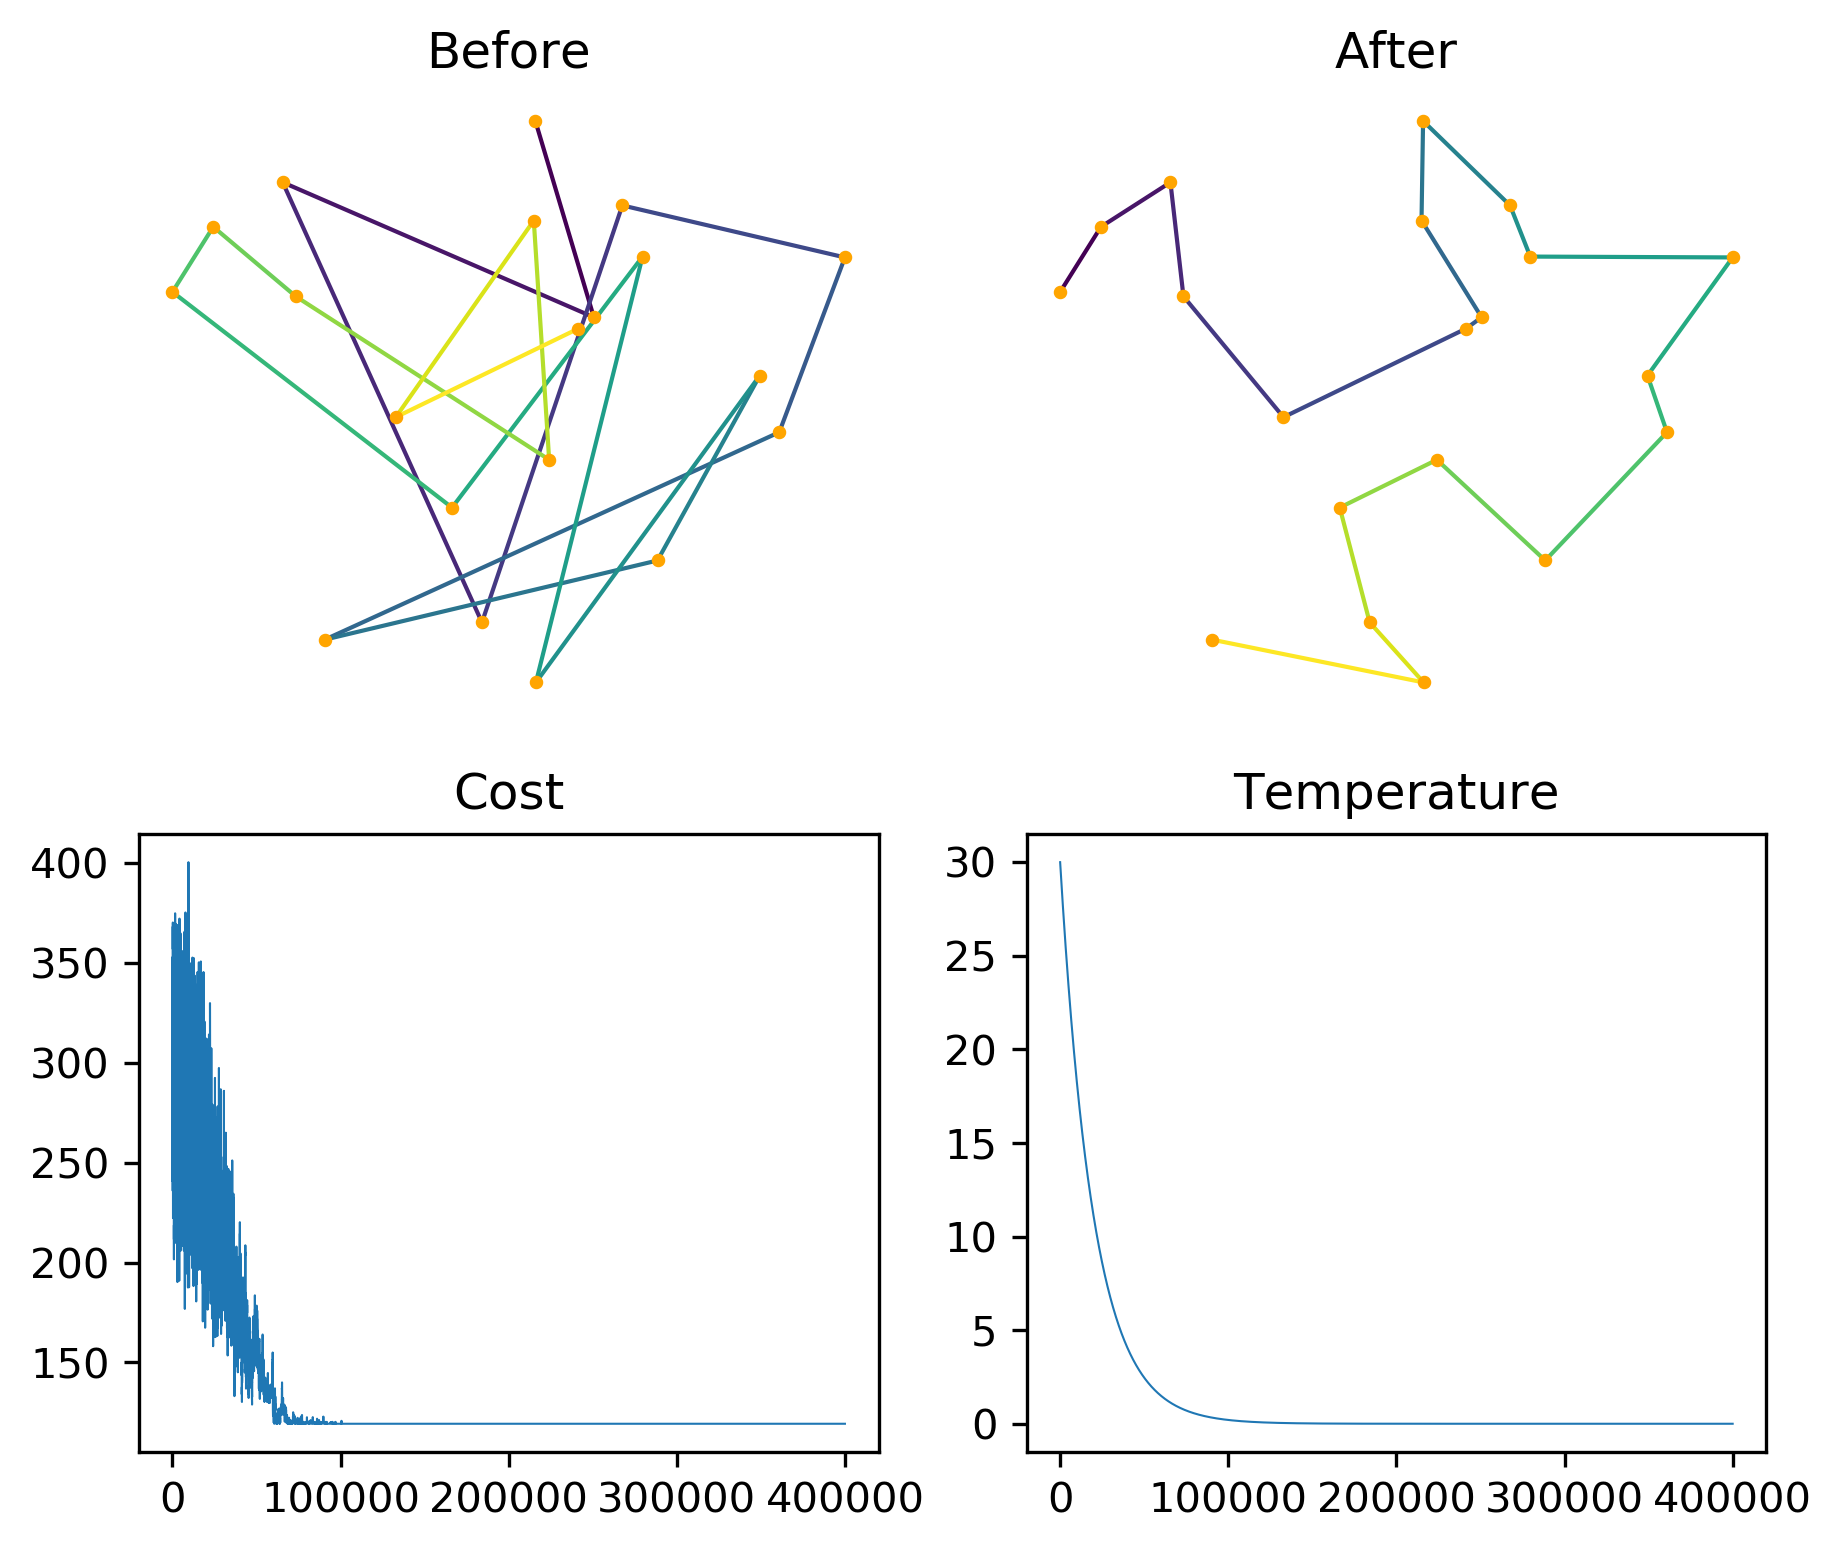

In [255]:
nodes = nodesNormal(1,10,20)
run(nodes,arbitrarySwap)

Iteration 0 Temperature = 30 Best Cost =  5114.292411640662  Current Cost =  5114.292411640662
Iteration 100000 Temperature = 0.2021131434084025 Best Cost =  1659.1217623436119  Current Cost =  1687.4560642013907
Iteration 200000 Temperature = 0.0013616574246141675 Best Cost =  1659.1217623436119  Current Cost =  1687.4560642013907
Iteration 300000 Temperature = 9.17362874447174e-06 Best Cost =  1659.1217623436119  Current Cost =  1687.4560642013907


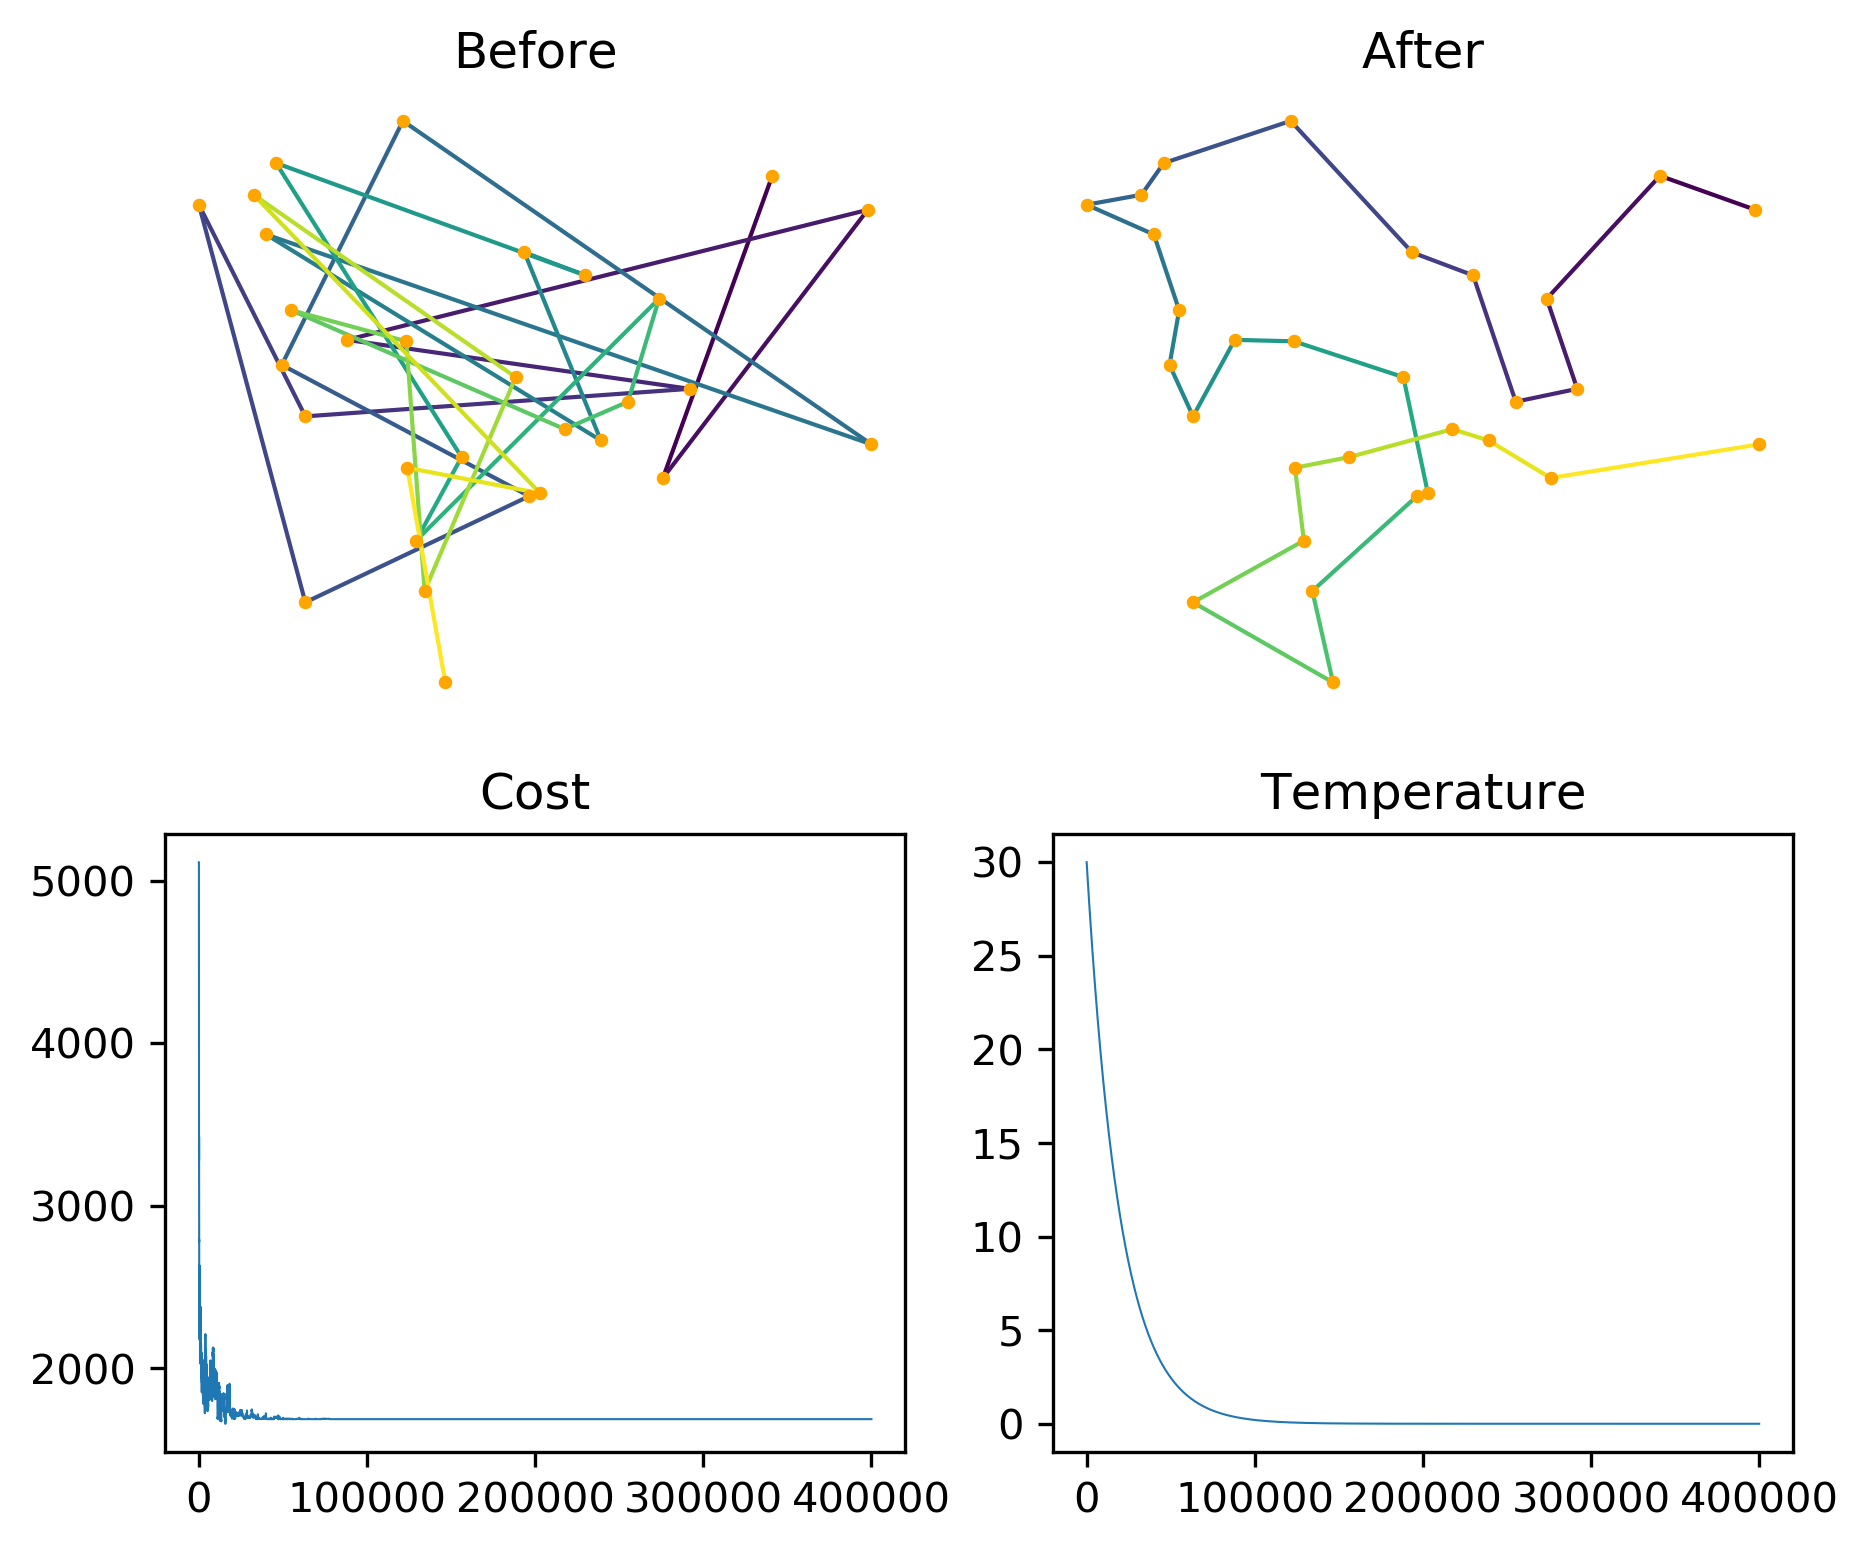

In [256]:
nodes = nodesNormal(0.5,100,30)
run(nodes,arbitrarySwap)

Iteration 0 Temperature = 30 Best Cost =  78.47971108827909  Current Cost =  78.47971108827909
Iteration 100000 Temperature = 0.2021131434084025 Best Cost =  28.857232082698964  Current Cost =  28.857232082698964
Iteration 200000 Temperature = 0.0013616574246141675 Best Cost =  26.973322723501163  Current Cost =  27.17496612897755
Iteration 300000 Temperature = 9.17362874447174e-06 Best Cost =  26.973322723501163  Current Cost =  27.17496612897755


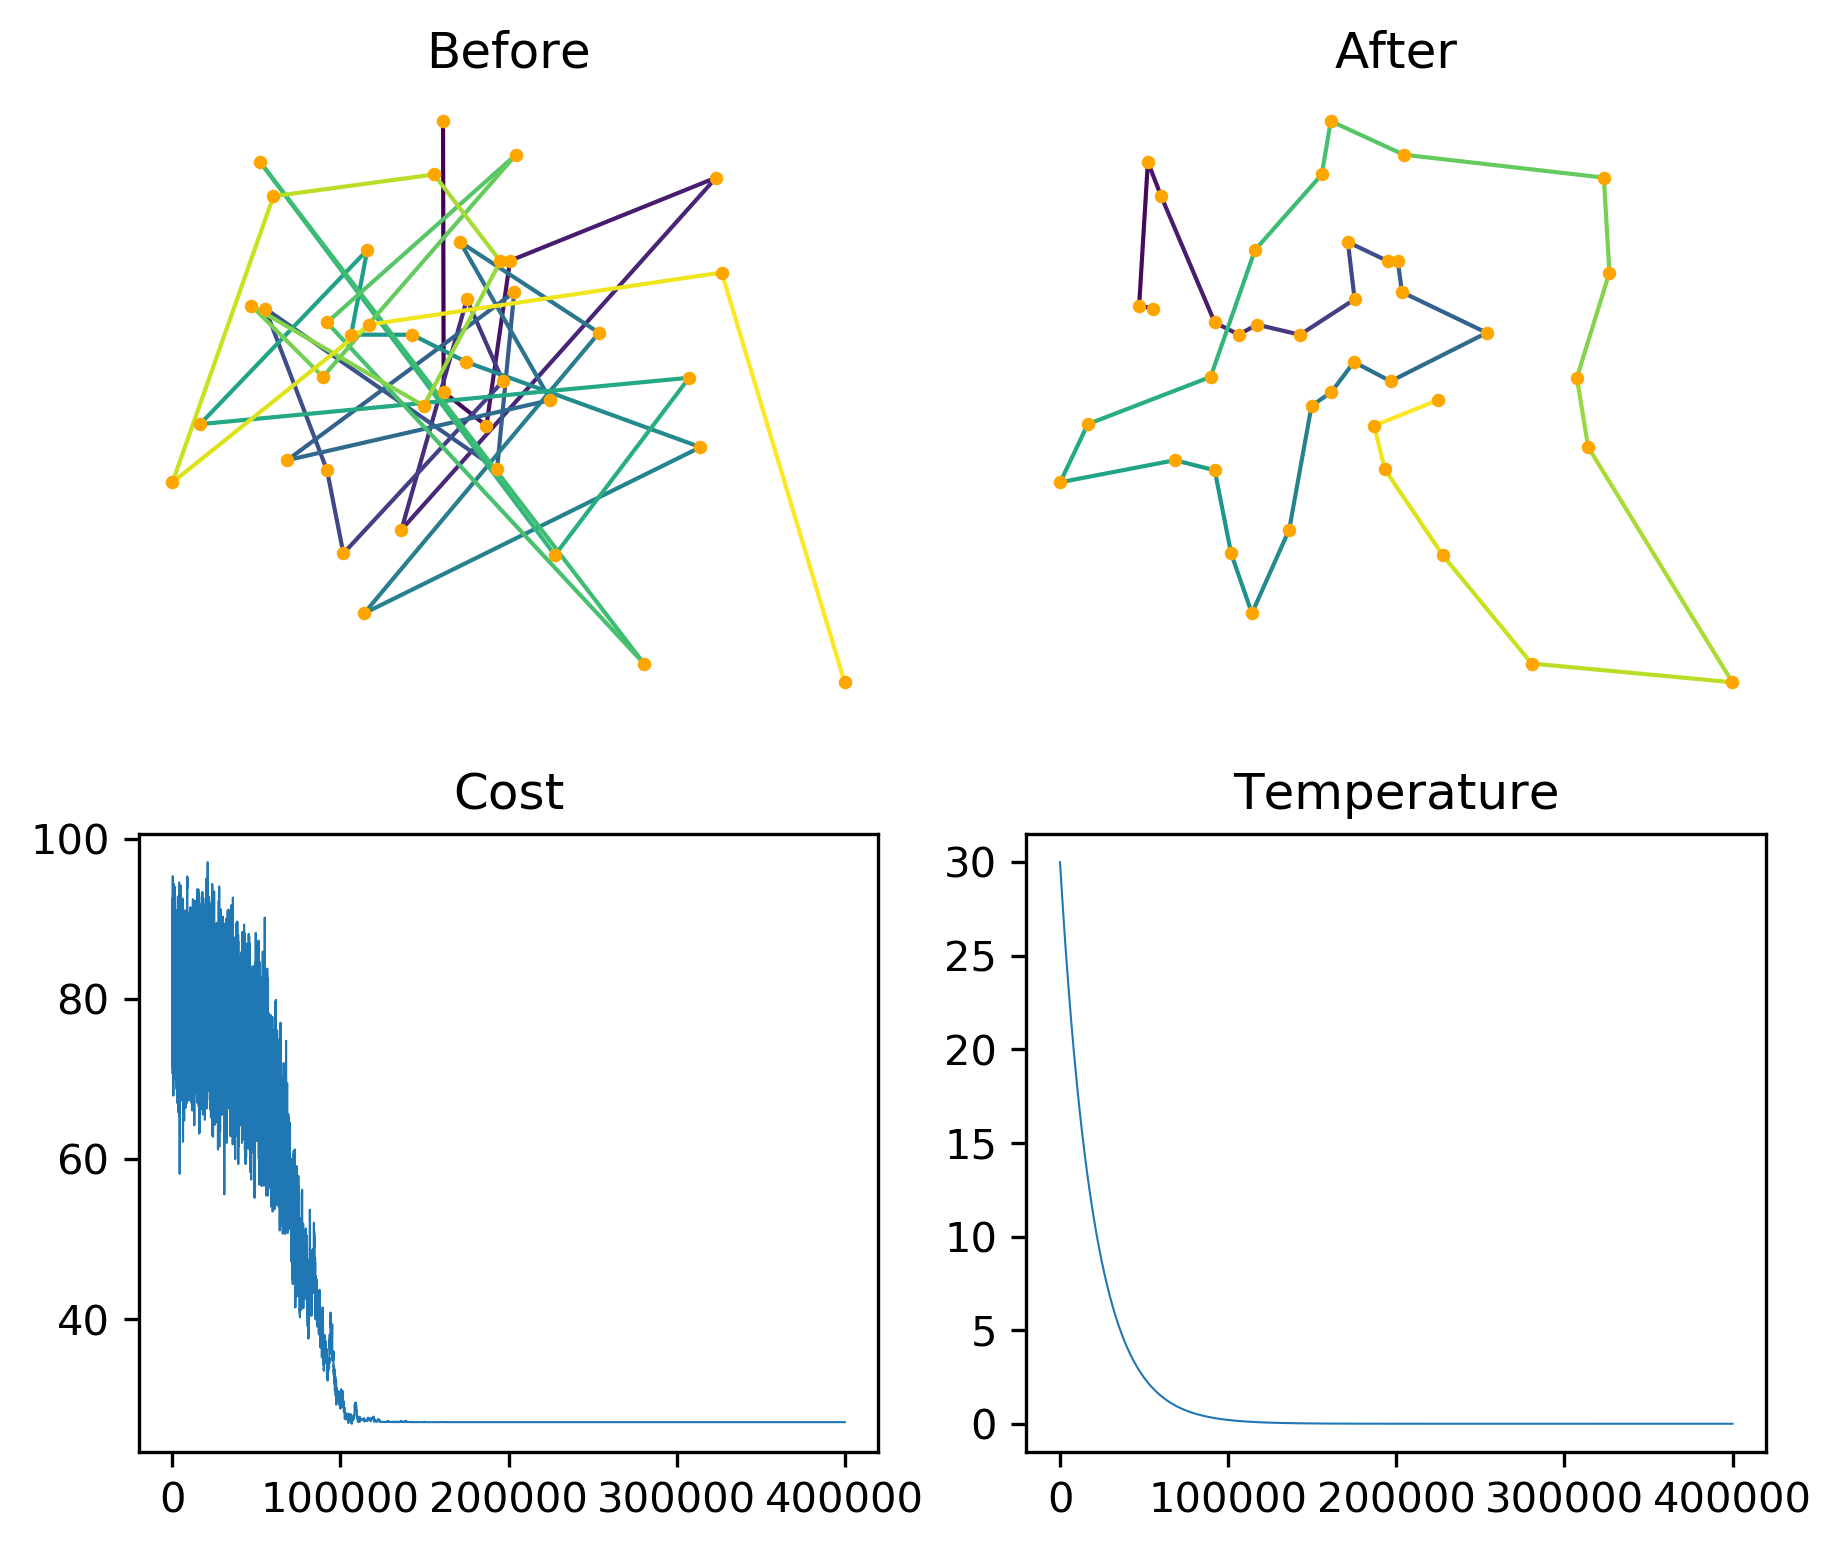

In [257]:
nodes = nodesNormal(10,1,40)
run(nodes,arbitrarySwap)

### Zadanie 2
Wygeneruj losowy obraz binarny o rozmiarze n×n i wybranej gęstości δ czarnych punktów δ = 0.1, 0.3, 0.4. Korzystając z różnego typu sąsiedztwa (4-sąsiadów, 8-sąsiadów,
8-16-sąsiadów) zaproponuj funkcję energii (np. w bliskiej odległości te same kolory przyciągają się, a w dalszej odpychają się) i dokonaj jej minimalizacji za pomocą algorytmu
symulowanego wyżarzania. W jaki sposób można generować stany sąsiednie? Jak różnią się uzyskane wyniki w zależności od rodzaju sąsiedztwa, wybranej funkcji energii i
szybkości spadku temperatury?

### Zadanie 3
Napisz program poszukujący rozwiązania łamigłówki Sudoku za pomocą symulowanego
wyżarzania. Plansza 9 × 9 ma zostać wczytana z pliku tekstowego, w którym pola puste
zaznaczone są znakiem x. Jako funkcję kosztu przyjmij sumę powtórzeń cyfr występujących w wierszach bloku 9 × 9, kolumnach bloku 9 × 9 oraz blokach 3 × 3. Zaproponuj
metodę generacji stanu sąsiedniego. Przedstaw zależność liczby iteracji algorytmu od
liczby pustych miejsc na planszy.

In [292]:
import numpy as np
import math
from random import shuffle, random, sample, randint
from copy import deepcopy
from math import exp

maxScore = 162
def acceptProb(curScore, candidateScore, t):
    return exp(float(curScore - candidateScore) / t)

class SudokuPuzzle(object):
    data = None
    original = None
                            
    def __init__(self, path = None, data = None, original =  None):
        if(path != None): #tworzenie z pliku
            with open(path) as file:  
                sudokuFile = file.read()

            if self.data == None:
                self.data = np.array([0 for i in range (81)])
            for i in range(81):
                char, sudokuFile = sudokuFile[0], sudokuFile[1:]
                if char in map(str, range(1, 10)):
                    self.data[i] = int(char)

            self.original = np.arange(81)[self.data > 0]
            
        else: #kopiowanie
            self.data = data
            self.original = original
            

            
    def randOnZeroes(self):
        for num in range(9):
            blockIndexes = self.getBlocks(num)
            block = self.data[blockIndexes]
            zeroIndexes = [ind for i,ind in enumerate(blockIndexes) if block[i] == 0]
            fill = [i for i in range(1,10) if i not in block]
            shuffle(fill)
            for ind, value in zip(zeroIndexes, fill):
                self.data[ind] = value
            
    def getBlocks(self, k, ignoreOriginal=False):
        rowOffset = (k // 3) * 3
        colOffset = (k % 3)  * 3
        indexes = [colOffset + (j%3) + 9*(rowOffset + (j//3)) for j in range(9)]
        if ignoreOriginal:
            indexes = list(filter(lambda x:x not in self.original, indexes))
        return indexes
        
    def getColumns(self, i):
        column = i
        indexes = [column + 9 * j for j in range(9)]
        return indexes
        
    def getRows(self, i):
        row = i
        indexes = [j + 9*row for j in range(9)]
        return indexes
        
    def drawSudoku(self):
        def notzero(s):
            if s != 0: return str(s)
            if s == 0: return "x"
            
        results = np.array([self.data[self.getRows(j)] for j in range(9)])
        out_s = ""
        for i, row in enumerate(results):
            if i%3==0: 
                out_s += "-"*21+'\n'
            out_s += " | ".join([" ".join(notzero(s) for s in list(row)[3*(k-1):3*k]) for k in range(1,4)]) + " \n"
        out_s += "-"*21+'\n'
        print(out_s) 
        
    def getScore(self): 
        distinct = 0
        for row in range(9):
            distinct += len(set(self.data[self.getRows(row)]))
        for col in range(9):
            distinct += len(set(self.data[self.getColumns(col)]))
        return maxScore - distinct #maxScore = 243 (81*3)
        
    def createCandidateData(self):
        candData = deepcopy(self.data)
        block = randint(0,8)
        digitsInRow = len(self.getBlocks(block, ignoreOriginal=True))
        digitsToSwap = sample(range(digitsInRow),2)
        i1, i2 = [self.getBlocks(block, ignoreOriginal=True)[i] for i in digitsToSwap]
        candData[i1], candData[i2] = candData[i2], candData[i1]
        return candData

def solve(path ,maxIter=10**5, t = 0.5, changeTemperature = lambda x : x*.99999):
    fillCorrectness = []
    
    oldSudoku = SudokuPuzzle(path = path)
    oldSudoku.drawSudoku()
    
    oldSudoku.randOnZeroes()
    bestSudoku = deepcopy(oldSudoku)
    curScore = oldSudoku.getScore()
    bestScore = curScore
    

    for i in range (maxIter):
        fillCorrectness.append(curScore)
        if (i % 10000 == 0): 
            print ("Iteration",i,"Temperature =",t,"Best Score = ",bestScore," Current Score = " , curScore)
            
        candidateData = oldSudoku.createCandidateData()
        candidateSudoku = SudokuPuzzle(data = candidateData,original = oldSudoku.original)
        cadidateScore = candidateSudoku.getScore()
        
        if (acceptProb(curScore,cadidateScore,t) > random() ):
            oldSudoku = candidateSudoku
            curScore = cadidateScore 

        if (curScore < bestScore):
            bestSudoku = deepcopy(oldSudoku)
            bestScore = bestSudoku.getScore()

        if cadidateScore == 0:
            oldSudoku = candidateSudoku
            break

        t = changeTemperature(t)


    if bestScore == 0:
        print ("\nSolution found ")
    else:
        print ("\nSolution not found - try again (Best Score:",bestScore, ")")
    print ("\nResult:")
    oldSudoku.drawSudoku()
    plt.plot(fillCorrectness, linewidth=0.5)
    plt.title("Fill Correctness")
    plt.show()
        

---------------------
2 x x | 6 x 7 | 5 x x 
x x x | x x x | x 9 x 
x x 7 | x x 1 | 3 x x 
---------------------
x 5 x | 7 x 2 | x x x 
x 7 x | x x x | x 2 x 
x x x | 1 8 9 | x 7 x 
---------------------
x x 3 | 5 x x | 6 x 4 
8 4 x | x x x | x x x 
x x 5 | 2 x 6 | x x 8 
---------------------

Iteration 0 Temperature = 0.5 Best Score =  35  Current Score =  35
Iteration 10000 Temperature = 0.45241848280737684 Best Score =  2  Current Score =  2
Iteration 20000 Temperature = 0.4093649671714617 Best Score =  2  Current Score =  5

Solution found 

Result:
---------------------
2 3 4 | 6 9 7 | 5 8 1 
6 8 1 | 3 5 4 | 2 9 7 
5 9 7 | 8 2 1 | 3 4 6 
---------------------
4 5 8 | 7 3 2 | 1 6 9 
1 7 9 | 4 6 5 | 8 2 3 
3 6 2 | 1 8 9 | 4 7 5 
---------------------
9 2 3 | 5 7 8 | 6 1 4 
8 4 6 | 9 1 3 | 7 5 2 
7 1 5 | 2 4 6 | 9 3 8 
---------------------



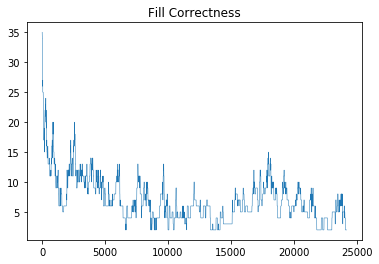

In [293]:
solve("sudoku.txt")